In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
# Import the time module.
import time



In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=db271b578383d9969a7095867f531d51


In [20]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



Beginning Data Retrieval     
-----------------------------


In [21]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | mooi river
City not found. Skipping...
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | amderma
City not found. Skipping...
Processing Record 6 of Set 1 | aquiraz
Processing Record 7 of Set 1 | roald
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | leningradskiy
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | plettenberg bay
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | marcona
City not found. Skipping...
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | faya
Processing Record 21 of Set 1 | tinskoy
Processing Record 22 of Set 1 | fort

City not found. Skipping...
Processing Record 40 of Set 4 | cayenne
Processing Record 41 of Set 4 | vallenar
Processing Record 42 of Set 4 | bargal
City not found. Skipping...
Processing Record 43 of Set 4 | sudak
Processing Record 44 of Set 4 | tautira
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | galesong
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | copiapo
Processing Record 50 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 1 of Set 5 | rongcheng
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | den helder
Processing Record 5 of Set 5 | saint george
Processing Record 6 of Set 5 | buala
Processing Record 7 of Set 5 | tashtyp
Processing Record 8 of Set 5 | diego de almagro
Processing Record 9 of Set 5 | ranfurly
Processing Record 10 of Set 5 | nome
Processing Record 11 of Set 5 | hami
Processing Record 1

Processing Record 33 of Set 8 | kokopo
Processing Record 34 of Set 8 | abha
Processing Record 35 of Set 8 | malpe
Processing Record 36 of Set 8 | chara
Processing Record 37 of Set 8 | port lincoln
Processing Record 38 of Set 8 | sisimiut
Processing Record 39 of Set 8 | comodoro rivadavia
Processing Record 40 of Set 8 | belyy yar
Processing Record 41 of Set 8 | marsh harbour
Processing Record 42 of Set 8 | bambous virieux
Processing Record 43 of Set 8 | saint-georges
Processing Record 44 of Set 8 | dunda
Processing Record 45 of Set 8 | celestun
Processing Record 46 of Set 8 | dhidhdhoo
Processing Record 47 of Set 8 | mehran
Processing Record 48 of Set 8 | suzhou
Processing Record 49 of Set 8 | ilinskiy
Processing Record 50 of Set 8 | foca
Processing Record 1 of Set 9 | kaohsiung
Processing Record 2 of Set 9 | tyukhtet
Processing Record 3 of Set 9 | kieta
Processing Record 4 of Set 9 | filadelfia
Processing Record 5 of Set 9 | amalapuram
Processing Record 6 of Set 9 | kahului
Processing 

Processing Record 24 of Set 12 | westport
Processing Record 25 of Set 12 | chernaya kholunitsa
Processing Record 26 of Set 12 | bridlington
Processing Record 27 of Set 12 | bourail
Processing Record 28 of Set 12 | normandin
Processing Record 29 of Set 12 | san patricio
Processing Record 30 of Set 12 | qasigiannguit
Processing Record 31 of Set 12 | boyolangu
Processing Record 32 of Set 12 | nuuk
Processing Record 33 of Set 12 | jimenez
Processing Record 34 of Set 12 | beaverlodge
Processing Record 35 of Set 12 | naryan-mar
Processing Record 36 of Set 12 | fare
Processing Record 37 of Set 12 | kokkola
Processing Record 38 of Set 12 | gushikawa
Processing Record 39 of Set 12 | carutapera
Processing Record 40 of Set 12 | naftah
City not found. Skipping...
Processing Record 41 of Set 12 | oussouye
Processing Record 42 of Set 12 | sao joao da barra
Processing Record 43 of Set 12 | bardstown
Processing Record 44 of Set 12 | brae
Processing Record 45 of Set 12 | klobuck
Processing Record 46 of

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.22,15.64,21.20,62,40,17.22,SJ,2020-10-29 10:27:42
1,Albany,42.60,-73.97,43.00,90,100,2.24,US,2020-10-29 10:27:49
2,Tuktoyaktuk,69.45,-133.04,9.32,96,98,10.00,CA,2020-10-29 10:27:49
3,Aquiraz,-3.90,-38.39,82.40,69,20,16.11,BR,2020-10-29 10:27:49
4,Roald,62.58,6.13,46.40,93,75,6.93,NO,2020-10-29 10:27:49
5,Cape Town,-33.93,18.42,64.00,55,75,13.87,ZA,2020-10-29 10:27:49
6,Punta Arenas,-53.15,-70.92,44.60,65,40,34.45,CL,2020-10-29 10:24:07
7,Leningradskiy,69.38,178.42,15.55,88,9,16.78,RU,2020-10-29 10:27:50
8,Hithadhoo,-0.60,73.08,83.86,74,0,13.76,MV,2020-10-29 10:27:50
9,Plettenberg Bay,-34.05,23.37,64.24,76,100,15.28,ZA,2020-10-29 10:27:50


In [23]:
#re order o columns
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [24]:
#assigning new order to DF 

city_data_df = city_data_df[new_column_order]

In [25]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2020-10-29 10:27:42,78.22,15.64,21.20,62,40,17.22
1,Albany,US,2020-10-29 10:27:49,42.60,-73.97,43.00,90,100,2.24
2,Tuktoyaktuk,CA,2020-10-29 10:27:49,69.45,-133.04,9.32,96,98,10.00
3,Aquiraz,BR,2020-10-29 10:27:49,-3.90,-38.39,82.40,69,20,16.11
4,Roald,NO,2020-10-29 10:27:49,62.58,6.13,46.40,93,75,6.93
5,Cape Town,ZA,2020-10-29 10:27:49,-33.93,18.42,64.00,55,75,13.87
6,Punta Arenas,CL,2020-10-29 10:24:07,-53.15,-70.92,44.60,65,40,34.45
7,Leningradskiy,RU,2020-10-29 10:27:50,69.38,178.42,15.55,88,9,16.78
8,Hithadhoo,MV,2020-10-29 10:27:50,-0.60,73.08,83.86,74,0,13.76
9,Plettenberg Bay,ZA,2020-10-29 10:27:50,-34.05,23.37,64.24,76,100,15.28


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

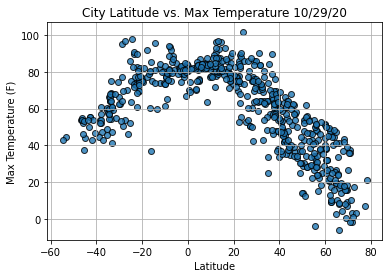

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

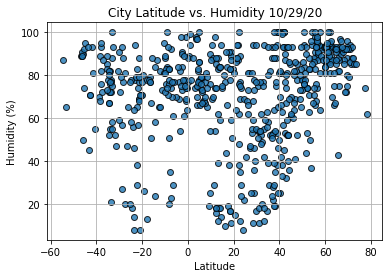

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

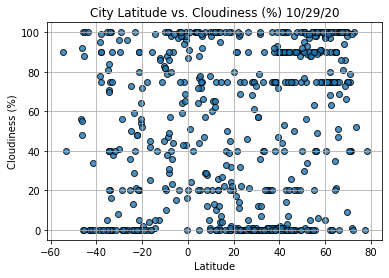

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()